In [1]:
!pip install scFates

In [2]:
import sys
!{sys.executable} -m pip -q install palantir fa2

In [ ]:
#load and merge FD59, FD82, FD125, subset by RBPMS and POU4F2 expr

In [3]:
import warnings
warnings.filterwarnings("ignore")
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout
## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline

sc.set_figure_params()
scf.set_figure_pubready()

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


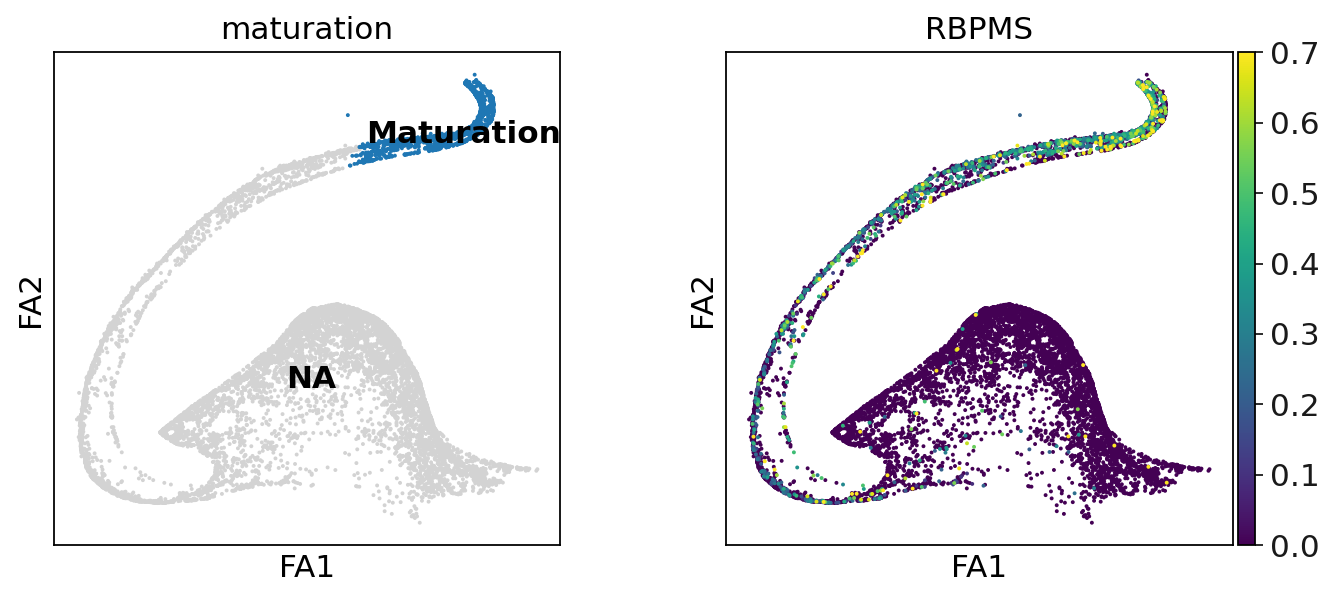

In [340]:
sc.pl.draw_graph(adatasubset,color=["maturation",'RBPMS'], vmax = 0.7, legend_loc = 'on data')

In [343]:
old_to_new = {
'23':'Migration',
'35':'Migration',
'36':'Migration'}
adatasubset.obs['migration'] = (
adatasubset.obs['leiden']
.map(old_to_new).astype('category')
)

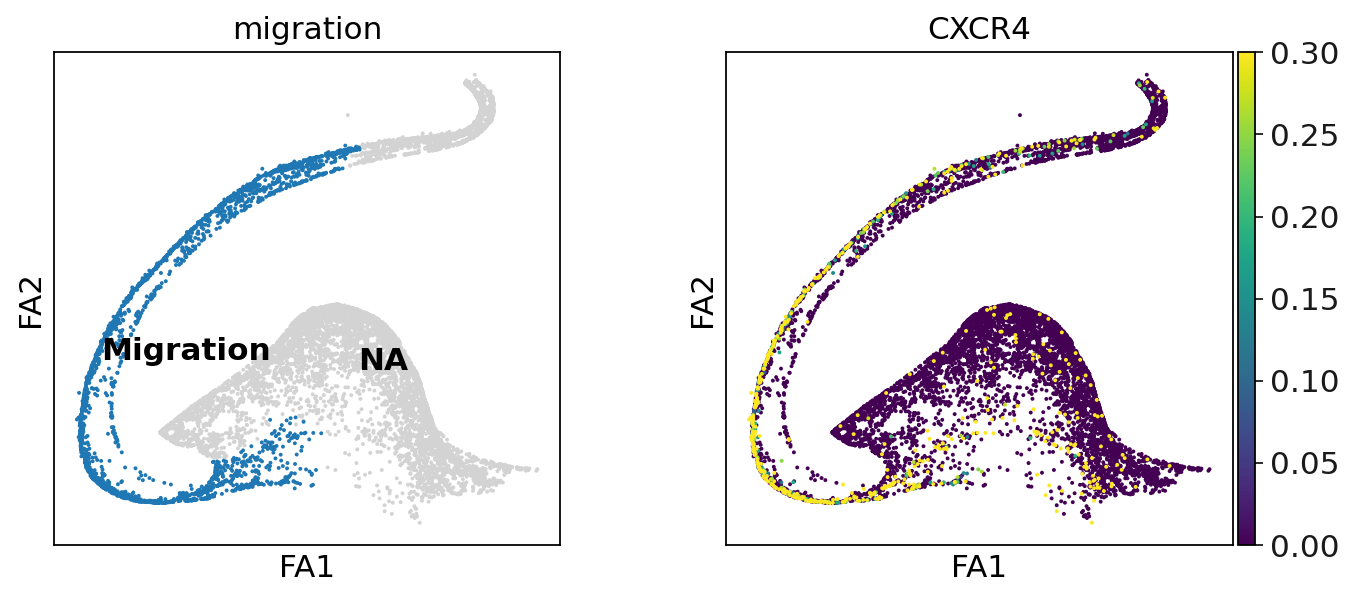

In [344]:
sc.pl.draw_graph(adatasubset,color=["migration",'CXCR4'], vmax = 0.3, legend_loc = 'on data')

In [345]:
old_to_new = {
'0':'Progenitors',
'5':'Progenitors',
'33':'Progenitors',
'17':'Progenitors'}
adatasubset.obs['progenitors'] = (
adatasubset.obs['leiden']
.map(old_to_new).astype('category')
)

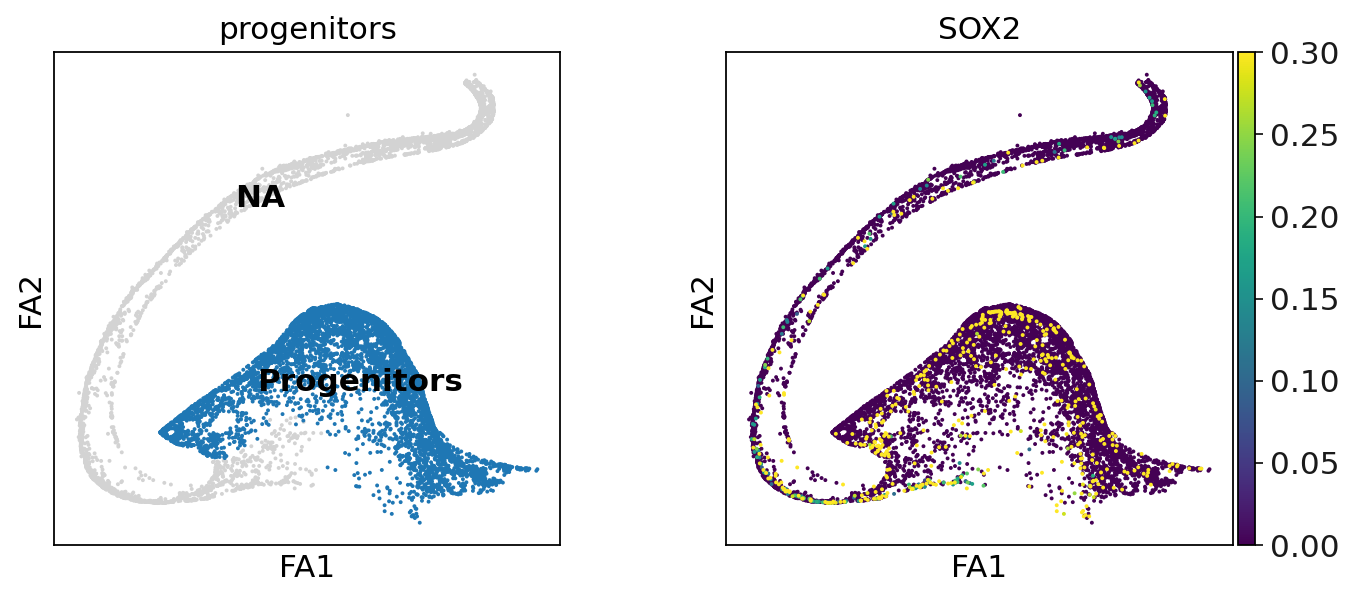

In [352]:
sc.pl.draw_graph(adatasubset,color=["progenitors",'SOX2'], vmax = [0.3], legend_loc = 'on data')

In [353]:
progenitors = adatasubset[adatasubset.obs['progenitors'].isin(['Progenitors'])]

In [354]:
progenitors.obs

,stage,batch,leiden,score,MP,Total_score,ST,Jon_positive,Jon_negative,Jon_pos_reg1,Jon_pos_reg2,Jon_reg1,t,seg,edge,t_sd,milestones,maturation,migration,progenitors
AAACCGTGATACCG-1-0,FD59,0,0,0.033652,0.146819,0.179665,0.171234,-0.018274,-0.011729,0.001632,0.012710,0.002572,0.156273,1,17|92,0.022149,164,NaN,NaN,Progenitors
AAACGCTGACCAAC-1-0,FD59,0,0,0.013176,-0.023334,-0.009883,-0.104780,-0.034852,-0.004532,-0.019642,-0.027774,0.004242,0.152981,1,100|98,0.024921,164,NaN,NaN,Progenitors
AAAGACGAAAAGTG-1-0,FD59,0,17,0.007822,-0.109703,0.010665,0.041465,0.000391,-0.012039,0.004259,-0.000443,0.003303,0.099991,1,109|123,0.040969,164,NaN,NaN,Progenitors
AAAGAGACACCTCC-1-0,FD59,0,17,0.025285,-0.011810,0.138918,0.207931,0.005551,-0.022458,-0.000468,0.002581,-0.005109,0.140246,1,100|98,0.036083,164,NaN,NaN,Progenitors
AAATACTGGGGAGT-1-0,FD59,0,17,0.024468,-0.109398,0.070866,0.163737,0.008869,-0.011018,-0.009889,0.017120,-0.032299,0.099589,1,22|57,0.047375,164,NaN,NaN,Progenitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCGAGGAGTTGCA-1-4,FD82,4,0,0.013958,-0.100199,0.025148,0.077854,0.005260,-0.010923,-0.011239,0.003477,-0.031275,0.153276,1,199|80,0.034284,164,NaN,NaN,Progenitors
TTTAGGCTGGGCAA-1-4,FD82,4,0,0.038727,-0.135840,-0.042667,-0.112443,-0.006248,-0.012359,-0.006323,-0.013885,-0.033165,0.190474,1,117|30,0.029937,164,NaN,NaN,Progenitors
TTTAGGCTTGCCTC-1-4,FD82,4,5,0.012397,0.061375,0.127708,0.124505,-0.008248,-0.014075,-0.009434,-0.010839,-0.026638,0.112814,1,162|176,0.071326,164,NaN,NaN,Progenitors
TTTAGGCTTTGACG-1-4,FD82,4,17,0.021906,-0.115372,0.037648,0.113925,0.015276,-0.020169,0.007857,0.005816,-0.008061,0.124761,1,161|140,0.042112,164,NaN,NaN,Progenitors


In [357]:
from statistics import mean 

In [358]:
mean(progenitors.obs['Jon_positive'])

0.0019546489506578318

In [359]:
mean(progenitors.obs['Jon_pos_reg1'])

0.0032422527102102415

In [360]:
mean(progenitors.obs['Jon_pos_reg2'])

0.011849833645306907

In [361]:
mean(progenitors.obs['Jon_negative'])

-0.004266638422258024

In [362]:
migration = adatasubset[adatasubset.obs['migration'].isin(['Migration'])]

In [363]:
mean(migration.obs['Jon_positive'])

-0.005096917422717381

In [364]:
mean(migration.obs['Jon_pos_reg1'])

0.002332057735604447

In [365]:
mean(migration.obs['Jon_pos_reg2'])

0.012673410245328094

In [366]:
mean(migration.obs['Jon_negative'])

-0.000954766522446738

In [367]:
maturation = adatasubset[adatasubset.obs['maturation'].isin(['Maturation'])]

In [368]:
mean(maturation.obs['Jon_positive'])

-0.008971455110331357

In [369]:
mean(maturation.obs['Jon_pos_reg1'])

-0.0017166369209154892

In [370]:
mean(maturation.obs['Jon_pos_reg2'])

0.005119431859032297

In [371]:
mean(maturation.obs['Jon_negative'])

0.00024002144993707703

In [372]:
old_to_new = {
'42':'Maturation',
'31':'Maturation',
'0':'Progenitors',
'5':'Progenitors',
'33':'Progenitors',
'17':'Progenitors',
'23':'Migration',
'35':'Migration',
'36':'Migration'
}
adatasubset.obs['annotation'] = (
adatasubset.obs['leiden']
.map(old_to_new).astype('category')
)

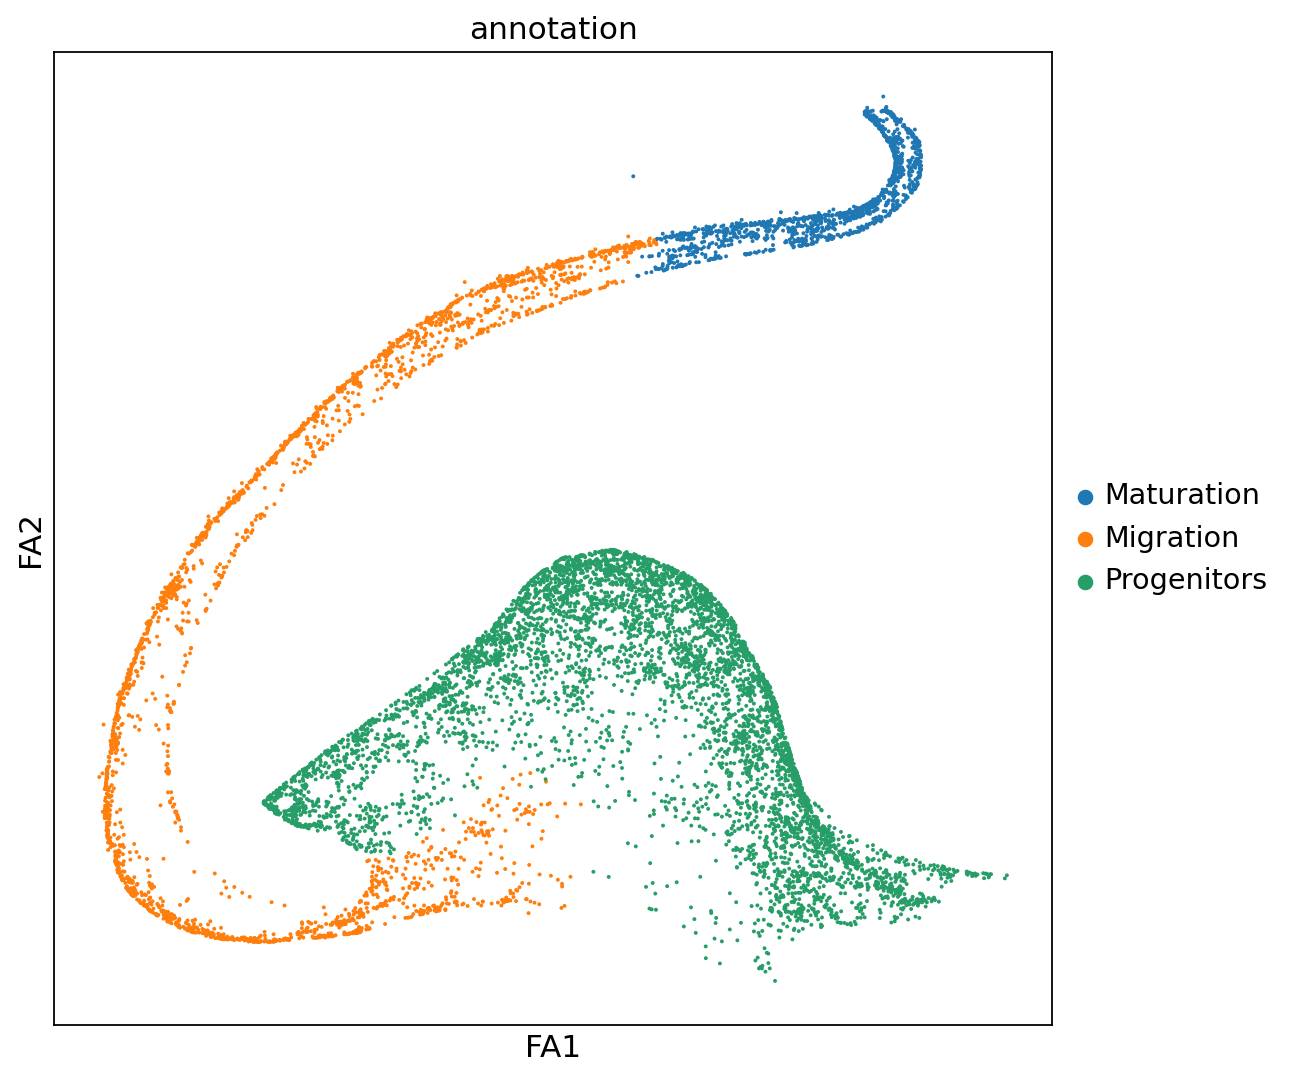

In [397]:
sc.set_figure_params(figsize = [8,8])
sc.pl.draw_graph(adatasubset,color=["annotation",])

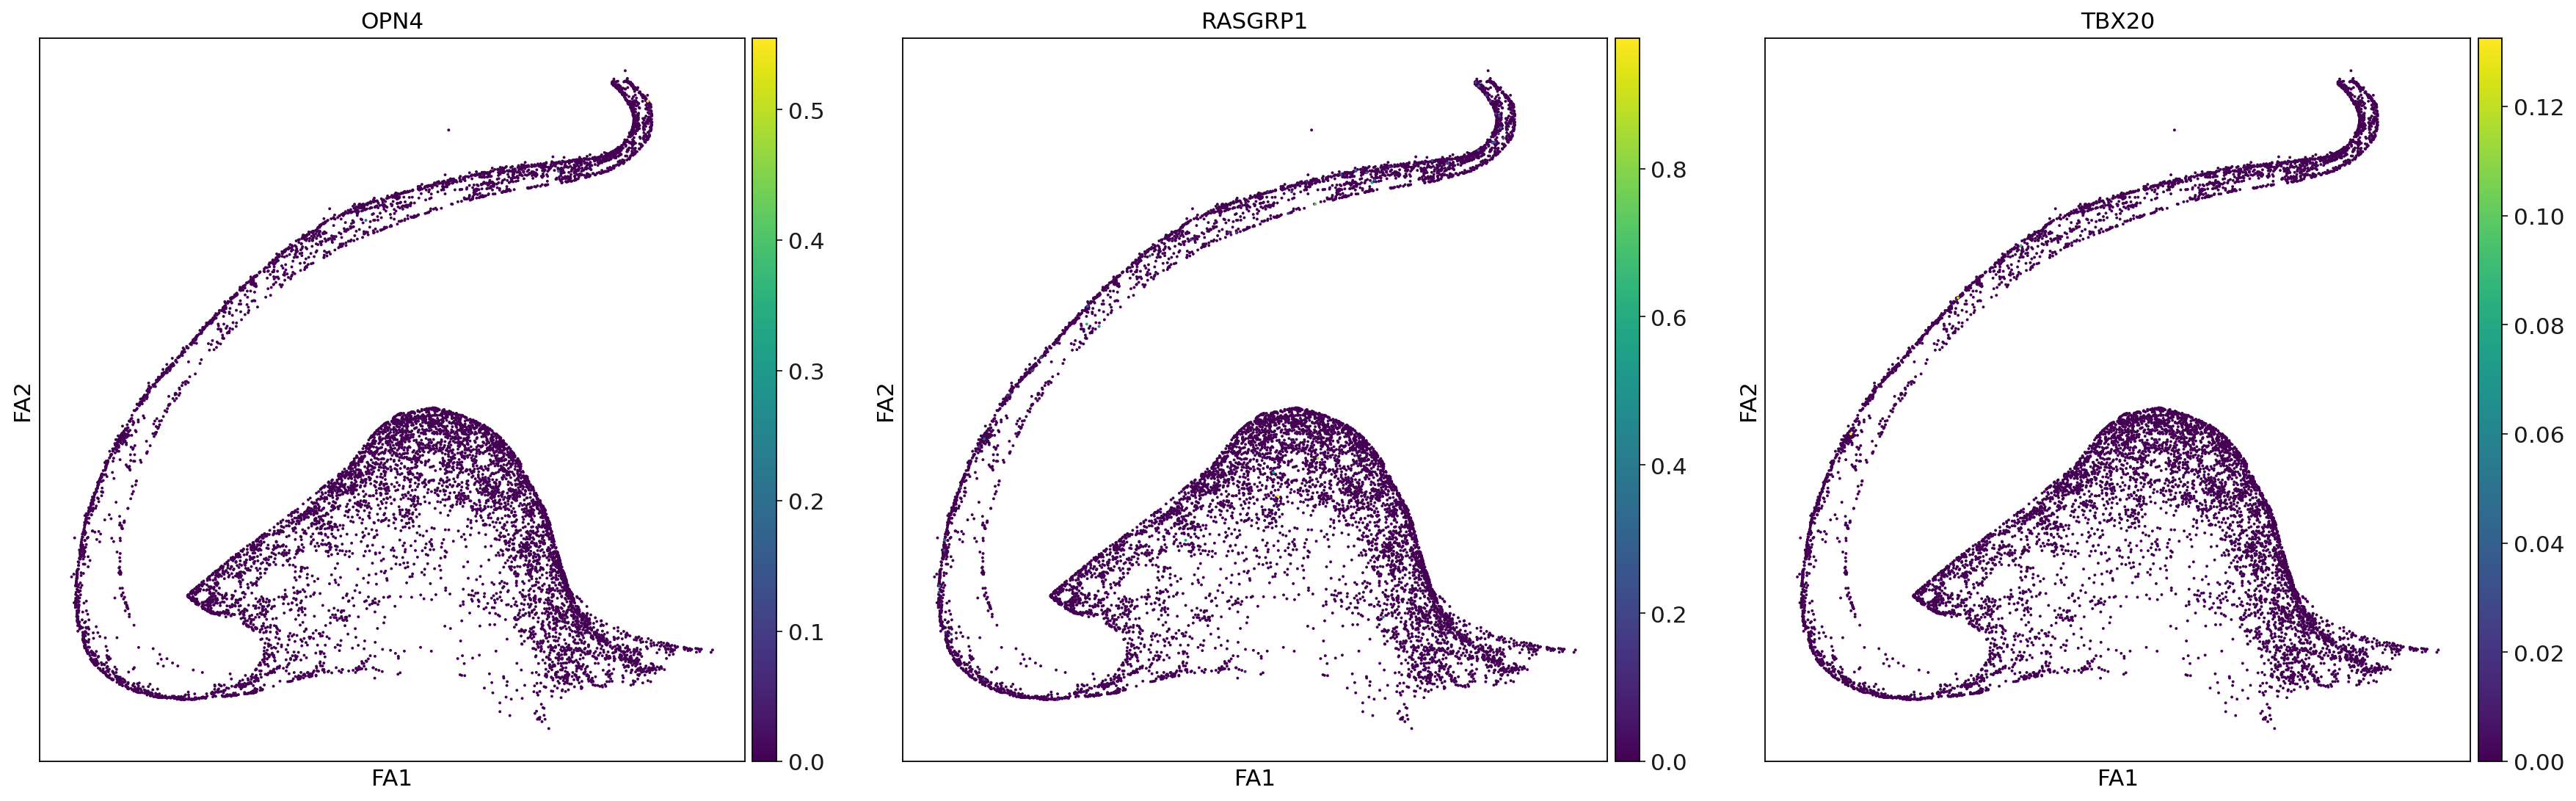

In [401]:
sc.pl.draw_graph(adatasubset,color=['OPN4','RASGRP1','TBX20'])

In [223]:
FD82 = sc.read_h5ad('/mnt/c/Users/Emil/10X/FD82.h5ad')

In [232]:
scf.tl.fit(FD82,n_jobs=20)

fit features associated with the trajectory
    single mapping : 100%|██████████████████████████████████████████████████████████████| 43/43 [00:15<00:00,  2.71it/s]
    finished (adata subsetted to keep only fitted features!) (0:00:16) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


<AxesSubplot:title={'center':'milestones'}, xlabel='FA1', ylabel='FA2'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


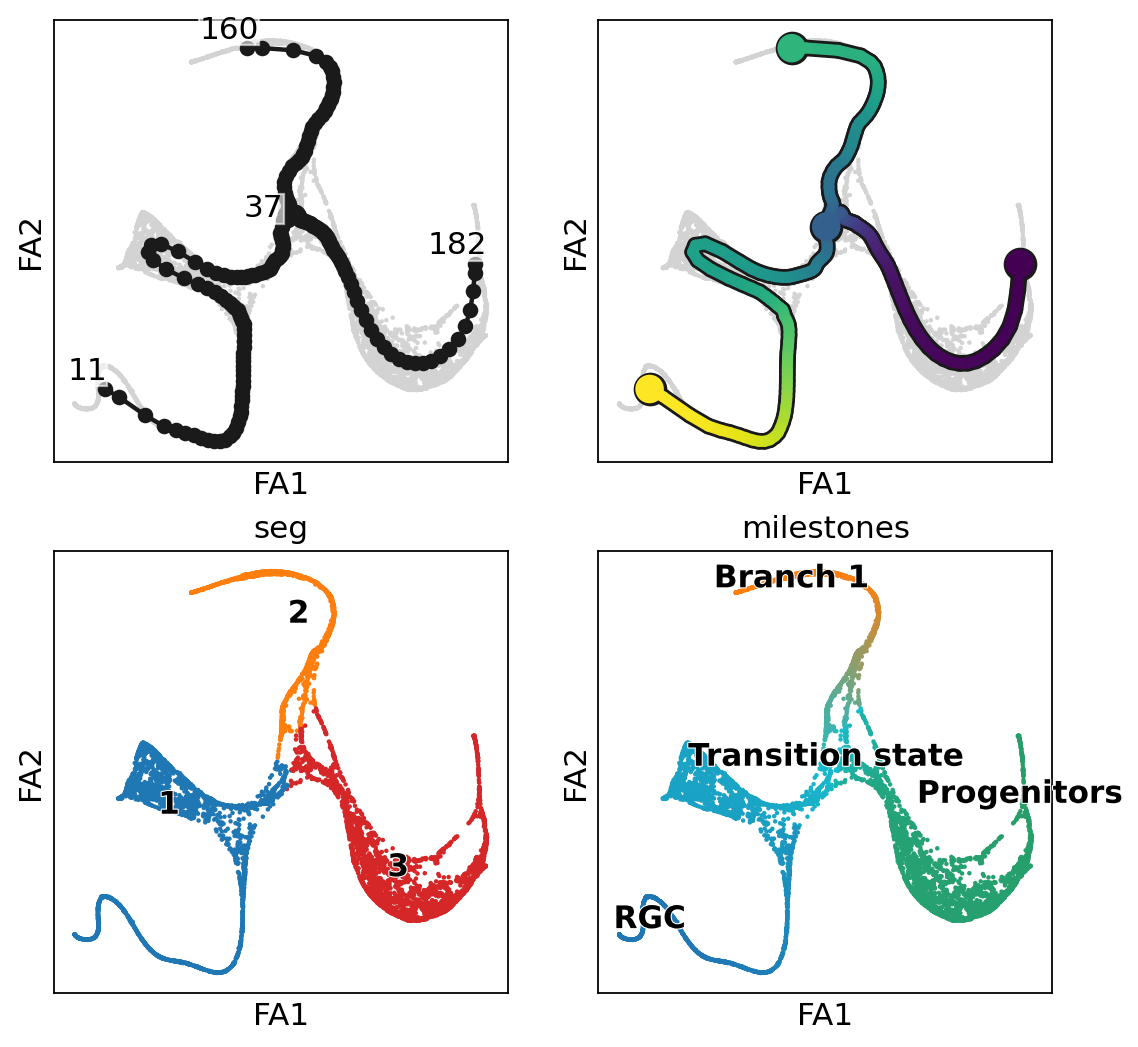

In [235]:
fig, axs=plt.subplots(2,2,figsize=(8,8))
axs=axs.ravel()
scf.pl.graph(FD82,basis="draw_graph_fa",show=False,ax=axs[0])
scf.pl.trajectory(FD82,basis="draw_graph_fa",show=False,ax=axs[1])
sc.pl.draw_graph(FD82,color=["seg"],legend_loc="on data",show=False,ax=axs[2],legend_fontoutline=True)
scf.pl.milestones(FD82,ax=axs[3],show=False,annotate=True)

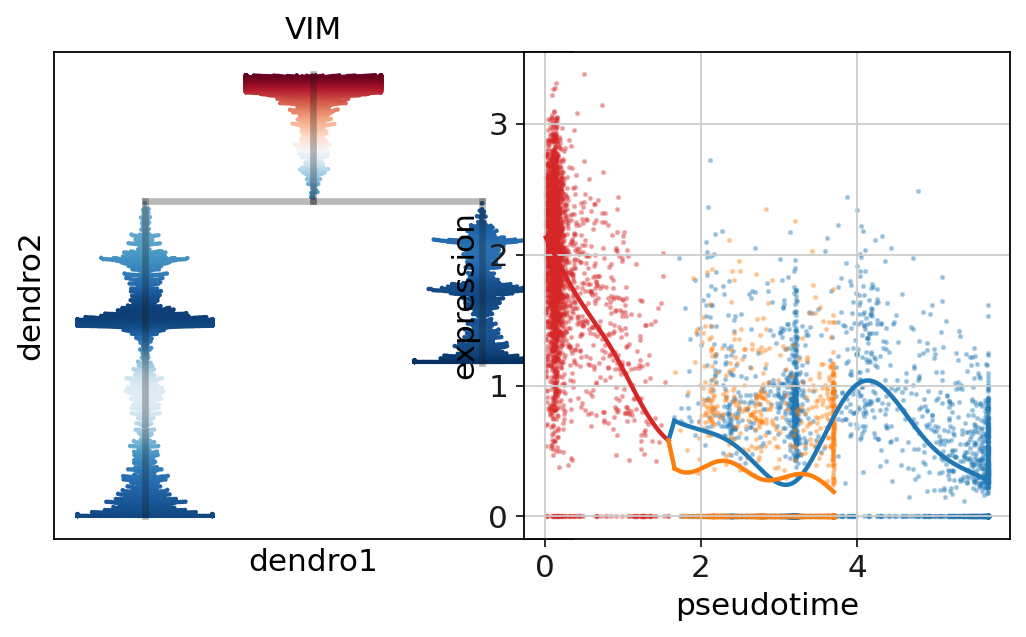

In [243]:
scf.pl.single_trend(FD82,"VIM",basis="dendro",wspace=-.25)

In [246]:
FD82.var

,gene_ids,n_cells,highly_variable,means,dispersions,dispersions_norm,p_val,A,fdr,st,signi
STMN1,ENSG00000117632,6571,False,1.341788,0.347801,-5.113672,0.000000e+00,1.238166,0.000000e+00,1,True
HMGN2,ENSG00000198830,4061,True,0.540863,0.691309,1.688768,0.000000e+00,1.328789,0.000000e+00,1,True
MARCKSL1,ENSG00000175130,6398,False,1.201400,0.378129,-4.513088,0.000000e+00,1.097659,0.000000e+00,1,True
PRDX1,ENSG00000117450,2605,True,0.280983,0.702398,1.908358,0.000000e+00,1.079969,0.000000e+00,1,True
MLLT11,ENSG00000213190,4346,False,0.683624,0.676866,1.402759,0.000000e+00,1.461221,0.000000e+00,1,True
CALM2,ENSG00000143933,5957,False,1.025304,0.435179,-3.383350,0.000000e+00,1.205867,0.000000e+00,1,True
TMSB10,ENSG00000034510,6031,False,1.162820,0.540705,-1.293631,0.000000e+00,1.770995,0.000000e+00,1,True
NEUROD1,ENSG00000162992,2045,True,0.297252,1.012742,8.054066,0.000000e+00,1.357350,0.000000e+00,1,True
HES6,ENSG00000144485,3124,True,0.394281,0.753861,2.927486,1.791004e-297,1.162045,3.919075e-293,1,True
CCK,ENSG00000187094,385,True,0.058964,1.535061,38.759972,0.000000e+00,1.135068,0.000000e+00,1,True


In [245]:
scf.tl.test_fork(FD82,root_milestone="Progenitors",milestones=["RGC","Branch 1"],n_jobs=20,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████████████████████████████████████████████████| 43/43 [00:08<00:00,  5.15it/s]
    test for upregulation for each leave vs root
    upreg Branch 1: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 74.41it/s]
    finished (0:00:09) --> added 
    .uns['Progenitors->RGC<>Branch 1']['fork'], DataFrame with fork test results.


In [277]:
FD82.uns['Progenitors->RGC<>Branch 1']

{'fork':                RGC  Branch 1           de_p            fdr  signi_p  \
 MARCKSL1  0.000000 -0.642964  2.108968e-174  9.068561e-173      1.0   
 PRDX1    -0.491025  0.000000  7.988700e-107  3.435141e-105      1.0   
 MLLT11    0.000000 -0.775439  1.236487e-250  5.316894e-249      1.0   
 CALM2     0.000000 -0.333583   2.765661e-82   1.189234e-80      1.0   
 TMSB10    0.000000 -0.978785   0.000000e+00   0.000000e+00      1.0   
 NEUROD1  -0.979856  0.000000   0.000000e+00   0.000000e+00      1.0   
 HES6     -0.393113  0.000000   1.068802e-80   4.595849e-79      1.0   
 GAP43     0.000000 -0.465465   0.000000e+00   0.000000e+00      1.0   
 NSG1      0.000000 -0.431197  2.867582e-156  1.233060e-154      1.0   
 CCNI      0.000000 -0.309300   3.484656e-27   1.498402e-25      1.0   
 SNCA      0.000000 -0.335342  7.787347e-235  3.348559e-233      1.0   
 TUBB2A    0.000000 -0.766288   0.000000e+00   0.000000e+00      1.0   
 TUBB2B    0.000000 -1.103839   0.000000e+00   0.000000e

In [253]:
scf.tl.branch_specific(FD82,root_milestone="Progenitors",milestones=["RGC","Branch 1"],effect=0.25)

    branch specific features: RGC: 21, Branch 1: 8
    finished --> updated 
    .uns['Progenitors->RGC<>Branch 1']['fork'], DataFrame updated with additionnal 'branch' column.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


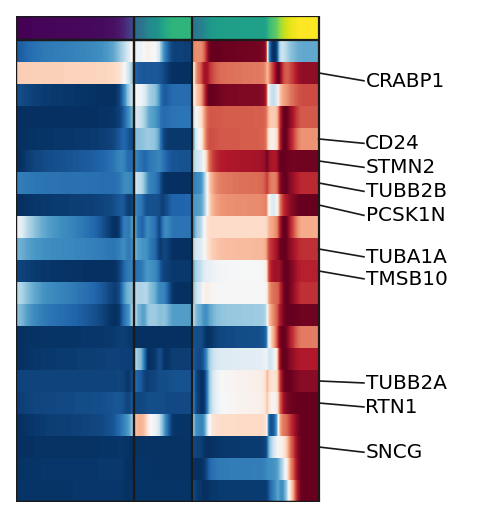

In [254]:
g1=scf.pl.trends(FD82,
                 root_milestone="Progenitors",
                 milestones=["RGC","Branch 1"],
                 branch="RGC",
                 plot_emb=False,ordering="max",return_genes=True)

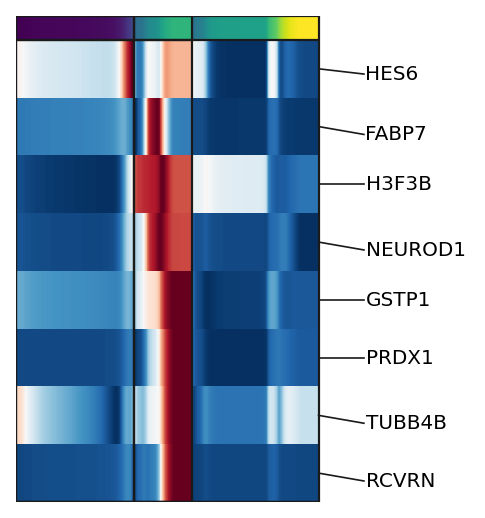

In [255]:
g2=scf.pl.trends(FD82,
                 root_milestone="Progenitors",
                 milestones=["RGC","Branch 1"],
                 branch="Branch 1",
                 plot_emb=False,ordering="max",return_genes=True)

In [256]:
gg=g1.tolist()+g2.tolist()

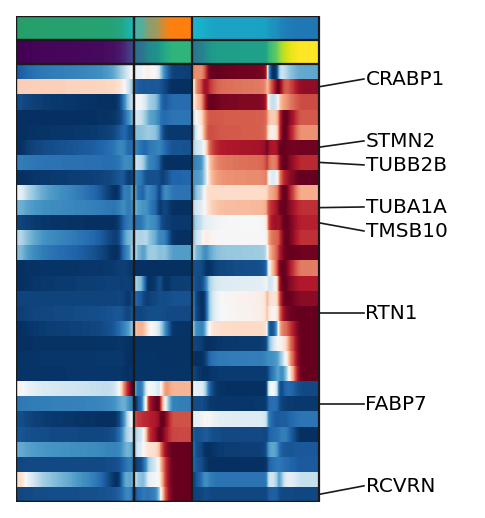

In [257]:
import matplotlib.pyplot as plt
g=scf.pl.trends(FD82,gg,figsize=(4,4),annot="milestones",n_features=8,
        plot_emb=False,ordering=None,return_genes=True)

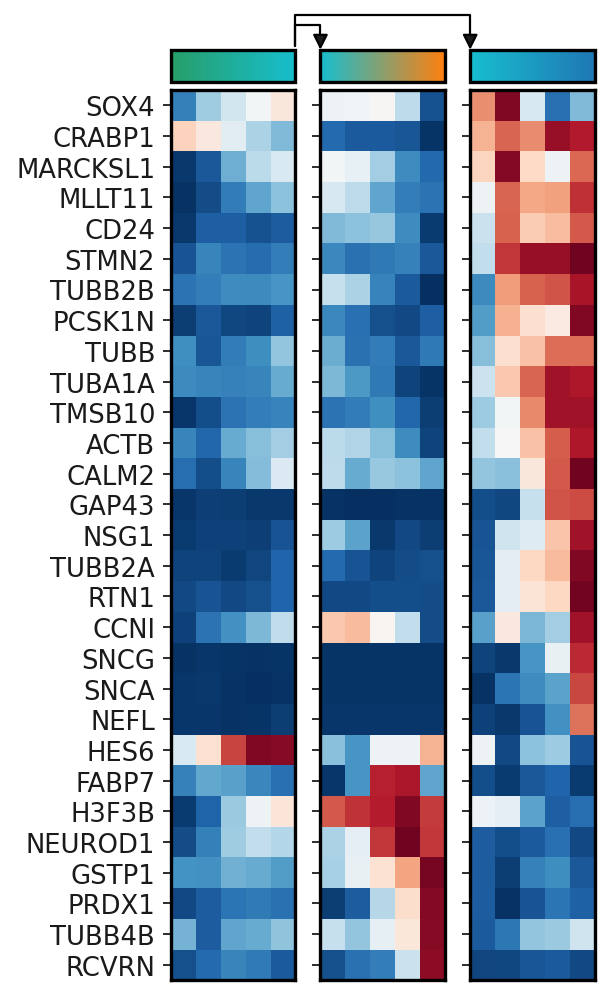

In [258]:
sc.set_figure_params()
scf.pl.matrix(FD82,gg,norm="minmax",cmap="RdBu_r",colorbar=False)

In [259]:
scf.tl.activation_lm(FD82,root_milestone="Progenitors",milestones=["RGC","Branch 1"],n_jobs=20)

    single mapping
    prefork activation: 100%|███████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 91.40it/s]
    7 early and 14 late features specific to leave RGC
    5 early and 3 late features specific to leave Branch 1
    finished (0:04:51) --> updated 
    .uns['Progenitors->RGC<>Branch 1']['fork'], DataFrame updated with additionnal 'slope','pval','fdr','prefork_signi' and 'module' columns.


In [279]:
scf.tl.synchro_path(FD82,root_milestone="Progenitors",milestones=["RGC","Branch 1"],w=100,n_map=50,n_jobs=20)

computing local correlations
    multi mapping permutations: 100%|███████████████████████████████████████████████████| 50/50 [01:27<00:00,  1.74s/it]
    finished (0:03:17) --> added 
    .uns['Progenitors->RGC<>Branch 1']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Progenitors->RGC<>Branch 1'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


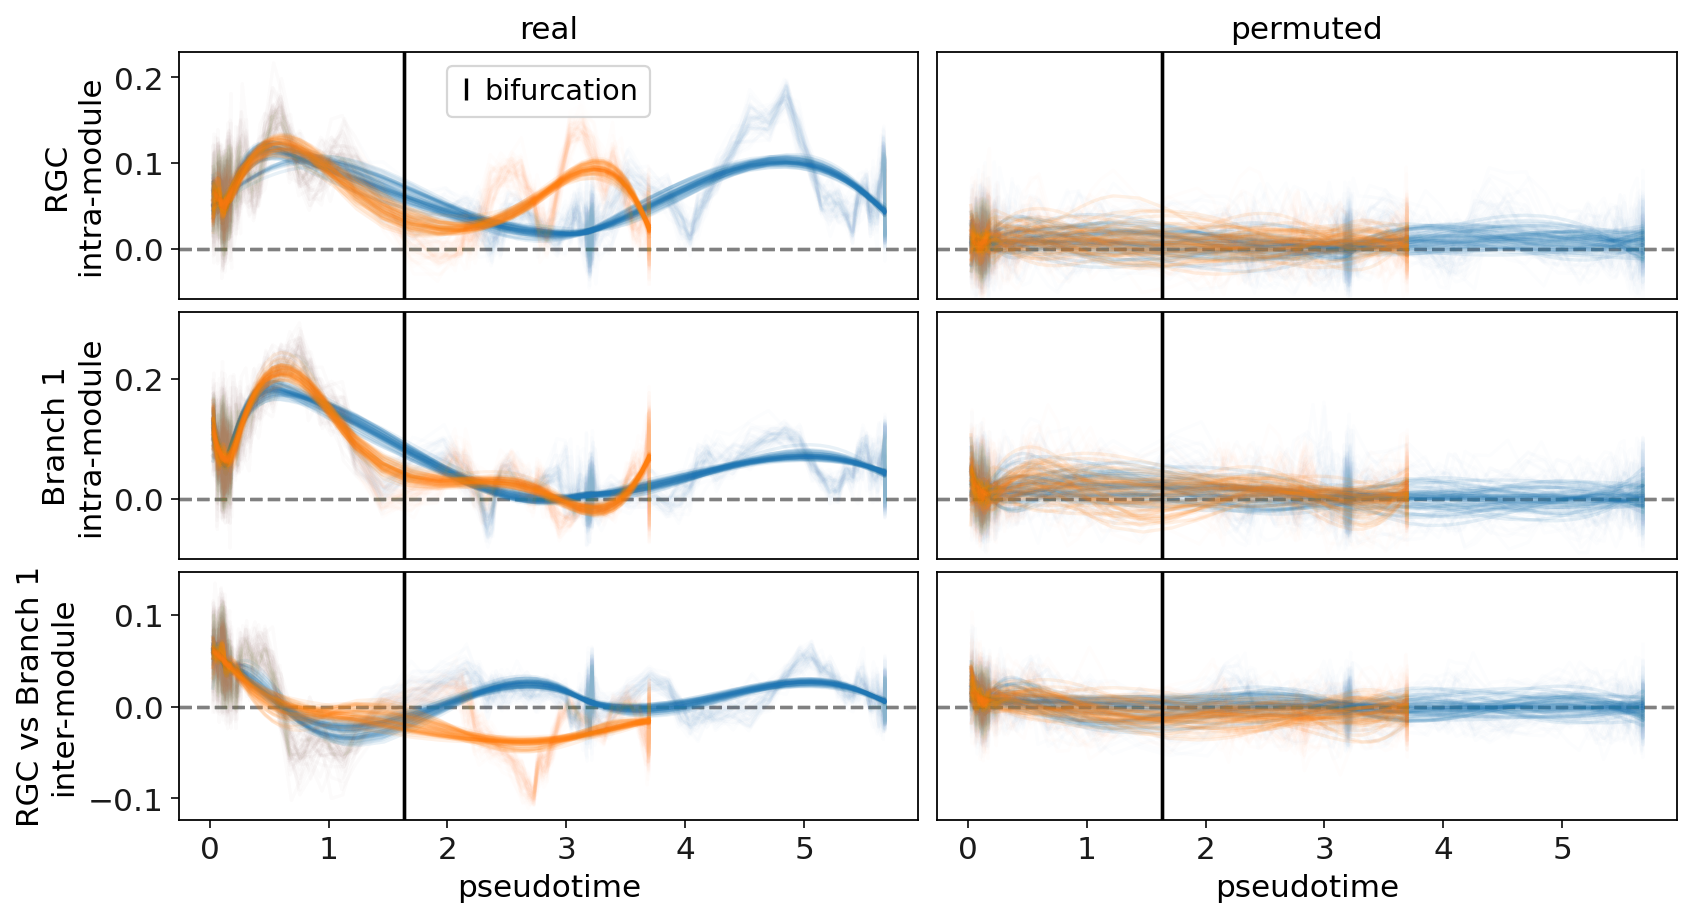

In [281]:
scf.pl.synchro_path(FD82,root_milestone="Progenitors",milestones=["RGC","Branch 1"])

In [282]:
scf.tl.module_inclusion(FD82,root_milestone="Progenitors",milestones=["RGC","Branch 1"],n_jobs=20,n_map=50,parallel_mode="mappings")

Calculating onset of features within their own module
    multi mapping: 100%|████████████████████████████████████████████████████████████████| 50/50 [10:46<00:00, 12.94s/it]
    finished (0:10:46) --> added 
    .uns['Progenitors->RGC<>Branch 1']['module_inclusion'], milestone specific dataframes containing inclusion timing for each gene in each probabilistic cells projection.
    .uns['Progenitors->RGC<>Branch 1']['fork'] has been updated with the column 'inclusion'.


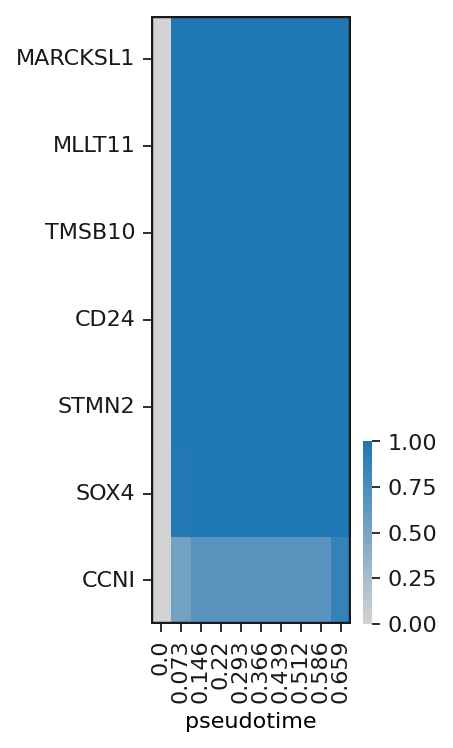

In [283]:
sc.set_figure_params(fontsize=10)
scf.pl.module_inclusion(FD82,root_milestone="Progenitors",milestones=["RGC","Branch 1"],
                        bins=10,branch="RGC",figsize=(2,5))

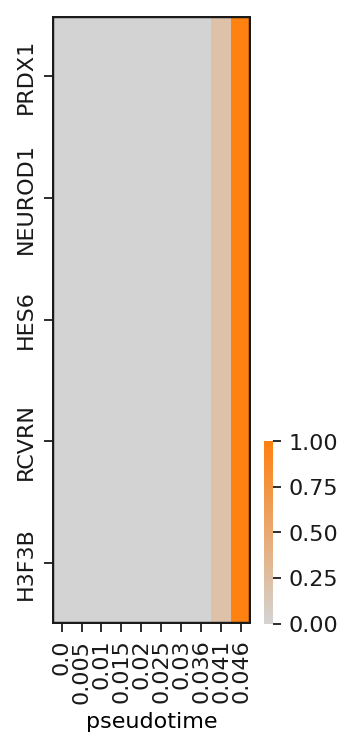

In [285]:
sc.set_figure_params(fontsize=10)
scf.pl.module_inclusion(FD82,root_milestone="Progenitors",milestones=["RGC","Branch 1"],
                        bins=10,branch="Branch 1",figsize=(2,5))